In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv(r"D:\Data_Science & Analytics\DataSets\iris (1).csv")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


*DATA PREPROCESSING**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


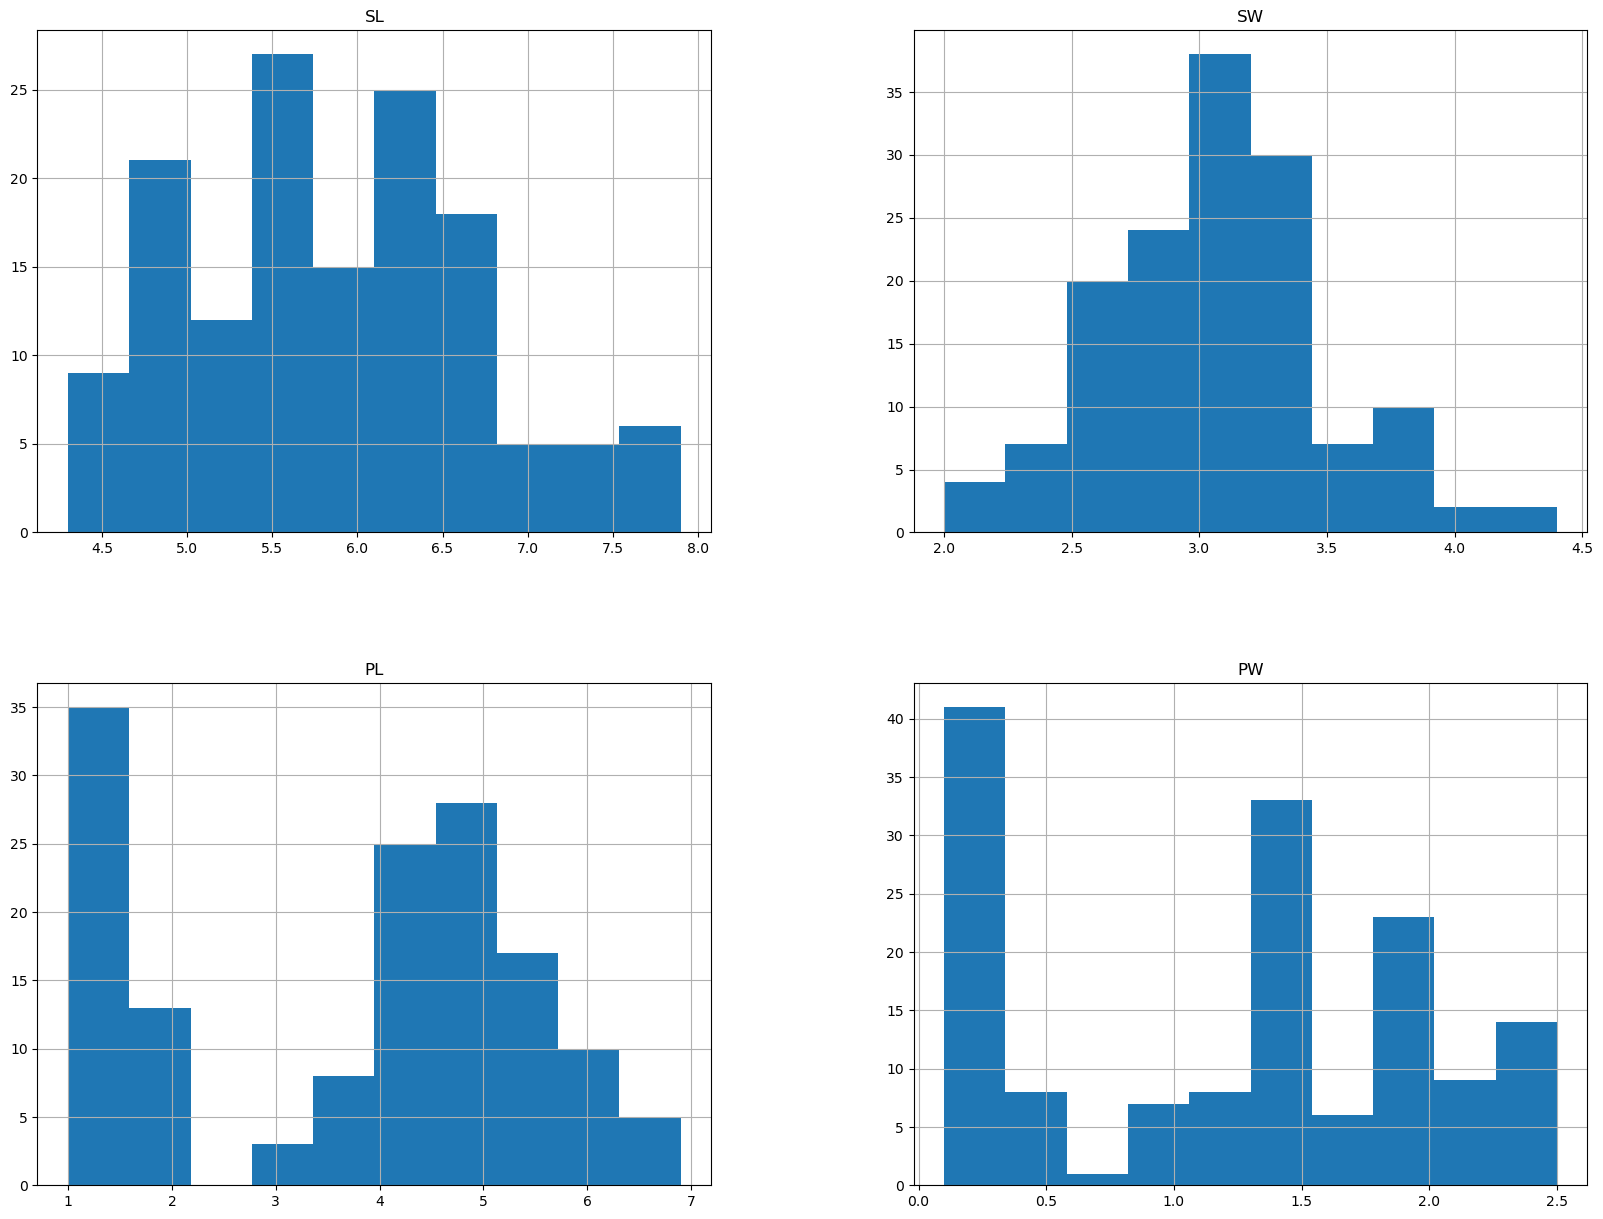

In [9]:
freqgraph=data.select_dtypes(include="float64")  # to find the frequency of the data
freqgraph.hist(figsize=(20,15));  

*MISSING VALUES HANDLING**

In [10]:
data['SL']=data['SL'].fillna(data['SL'].mean())
data['SW']=data['SW'].fillna(data['SW'].mean())
data['PL']=data['PL'].fillna(data['PL'].mean())

In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

**OUTLIER HANDLING**

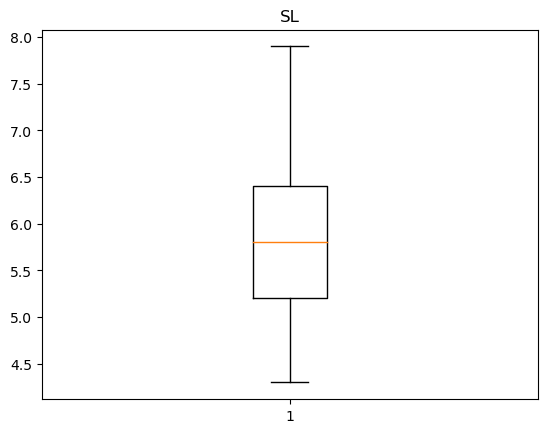

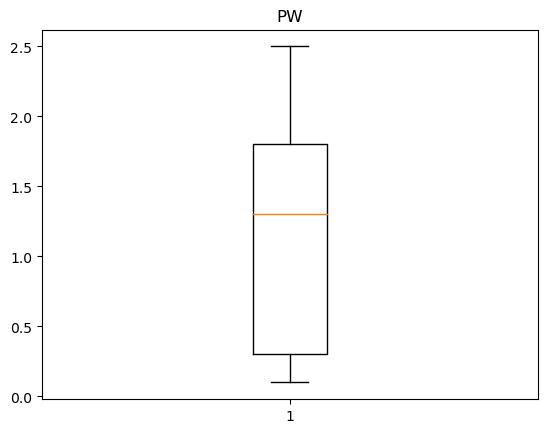

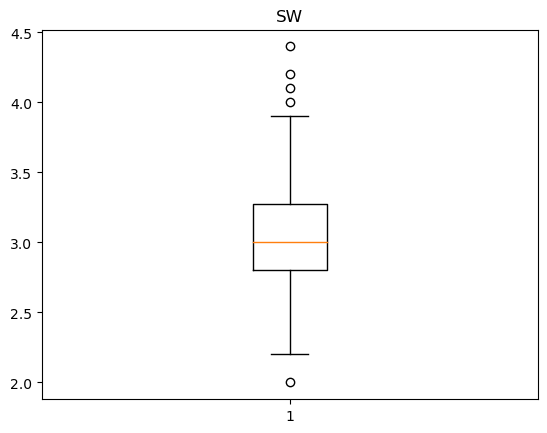

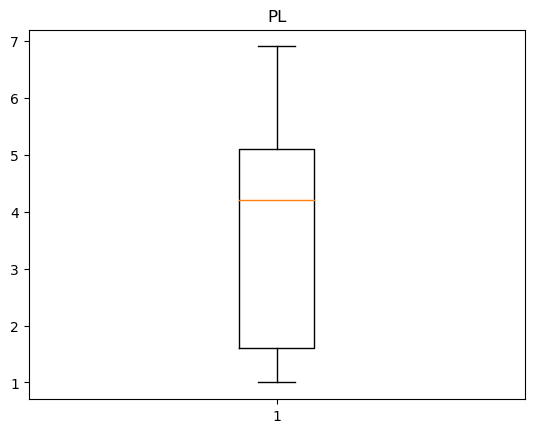

In [12]:
num_columns={'SL','SW','PL','PW'}
for i in num_columns:
 plt.figure()
 plt.boxplot(data[i])
 plt.title(i);

In [13]:
#Outlier handling for SW
Q1=np.percentile(data['SW'],25,method='midpoint')
Q2=np.percentile(data['SW'],50,method='midpoint')
Q3=np.percentile(data['SW'],75,method='midpoint')
print("Q1 is : ",Q1)
print("Q2 is : ",Q2)
print("Q3 is : ",Q3)           

Q1 is :  2.8
Q2 is :  3.0
Q3 is :  3.25


In [14]:
IQR=Q3-Q1
IQR

0.4500000000000002

In [15]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('lower value:',low_lim)
print("upper value: ",up_lim) 

lower value: 2.1249999999999996
upper value:  3.9250000000000003


In [16]:
outliers=[]    #find the outlier values to list
for x in data['SW']:
  if((x<low_lim)or (x>up_lim)):
    outliers.append(x)
                    
print(outliers)            

[4.0, 4.4, 4.1, 4.2, 2.0]


In [17]:
data['SW']=data['SW'].clip(lower=low_lim,upper=up_lim)

In [18]:
outliers=[]
for x in data['SW']:
  if((x<low_lim)or (x>up_lim)):
    outliers.append(x)
                    
print(outliers)
 #now there is no outliers after clipping 

[]


**LABEL ENCODING**

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
data['Classification']=le.fit_transform(data['Classification'])

In [21]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [23]:
data.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.043472,3.756250,1.198667,1.000000
std,0.808480,0.402836,1.725479,0.763161,0.819232
min,4.300000,2.125000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.200000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,3.925000,6.900000,2.500000,2.000000


**CORRELATION**

<Axes: >

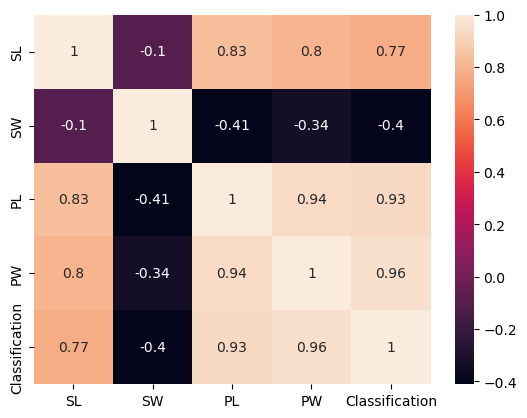

In [24]:
sns.heatmap(data.corr(),annot=True)

**CLASSIFICATION**

In [25]:
X=data.drop('Classification',axis=1)
y=data['Classification']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

**LOGISTIC REGRESSION**

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
from sklearn.linear_model import LogisticRegression  #train and preadict categorical values
log_reg=LogisticRegression()

In [29]:
log_reg.fit(X_train,y_train)
log_pred=log_reg.predict(X_test)

In [30]:
log_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [31]:
X_test

,SL,SW,PL,PW
73,6.100000,2.800000,4.70000,1.2
18,5.700000,3.800000,1.70000,0.3
118,7.700000,2.600000,6.90000,2.3
78,6.000000,2.900000,4.50000,1.5
76,6.800000,2.800000,4.80000,1.4
31,5.400000,3.400000,1.50000,0.4
64,5.600000,2.900000,3.60000,1.3
141,5.855944,3.100000,5.10000,2.3
68,6.200000,2.200000,4.50000,1.5
82,5.800000,2.700000,3.90000,1.2


In [32]:
#EVALUATE THE LOGISTIC REGREASSION MODEL USING CONFUSION METRICS
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [33]:
confusion_matrix_data=confusion_matrix(y_test,log_pred)
confusion_matrix_data

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [34]:
print("Accuracy: ",accuracy_score(y_test,log_pred))
#print("Precision: ",precision_score(y_test,log_pred))   precision=true_positives/(true_positives+false_positives)
#print("Recall: ",recall_score(y_test,log_pred))      tp/(tp+fn)
#print("F1: ",f1_score(y_test,log_pred))       f1=(2*preci*recall)/(prec+recall)

Accuracy:  0.9736842105263158


**KNN METHOD**

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
metric_k=[]
neighbors=np.arange(3,25)
neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24])

In [37]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(X_train,y_train)
    knn_pred=classifier.predict(X_test)
    accuracy =accuracy_score(y_test,knn_pred)
    metric_k.append(accuracy)

In [38]:
metric_k

[0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

Text(0, 0.5, 'Metric K')

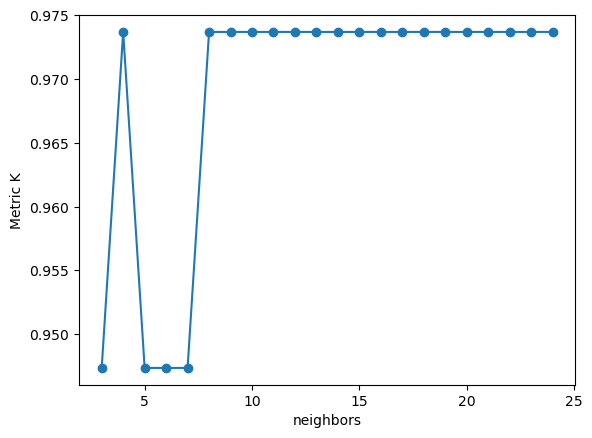

In [39]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("neighbors")
plt.ylabel("Metric K")

In [40]:
classifier=KNeighborsClassifier(n_neighbors=15,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

In [41]:
confusion_matrix(y_test,knn_pred)   #[[TP1,FP1,FN1],[FP2,TP2,FN2],[FN3,FP3,TP3]]

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [42]:
print("Accuracy: ",accuracy_score(y_test,knn_pred))
# print("Precision: ",precision_score(y_test,knn_pred))
# print("Recall: ",recall_score(y_test,knn_pred))
# print("F1: ",f1_score(y_test,knn_pred))

Accuracy:  0.9736842105263158


**SVM**

In [43]:
#RBF
from sklearn.svm import SVC 
sv_clf=SVC()    
sv_clf.fit(X_train,y_train)

SVC()

In [44]:
y_pred=sv_clf.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.9736842105263158


In [46]:
print(confusion_matrix(y_test,y_pred))

[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


In [47]:
#kernal=linear
sv_clf1=SVC(kernel='linear')  #kernal =poly
sv_clf1.fit(X_train,y_train)

SVC(kernel='linear')

In [48]:
y1_pred=sv_clf1.predict(X_test)

In [49]:
print("Accuracy: ",accuracy_score(y_test,y1_pred))

Accuracy:  1.0


In [50]:
print(confusion_matrix(y_test,y1_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


**DECISION TREE**

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()   #random_state=42 - give the same result ie. reproducable #DecisionTreeClassifier() - give diffrenet values
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)

In [52]:
print("Accuracy: ",accuracy_score(y_test,dt_pred))

Accuracy:  1.0


In [53]:
print(confusion_matrix(y_test,y_pred))

[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


**RANDOM FOREST**

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier() 
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
rf_pred=rf_clf.predict(X_test)

In [56]:
print("Accuracy: ",accuracy_score(y_test,rf_pred))

Accuracy:  1.0


In [57]:
print(confusion_matrix(y_test,rf_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


**HYPER PARAMETER TUNING**

In [58]:
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [59]:
rf1_pred=rf_clf1.predict(X_test)

In [60]:
print("Accuracy: ",accuracy_score(y_test,rf1_pred))

Accuracy:  1.0
